In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#
plt.rcParams['figure.figsize'] = (12, 5)
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False

#
sns.set_palette('muted')

# Read - parse dates
df = pd.read_csv('Data/MPS Stolen Animals Clean II.csv', parse_dates=['year_and_month'])

print(f"Shape: {df.shape}")
display(df.head(3))

Shape: (3747, 7)


,borough,year_and_month,month,year,season,pandemic_period,recovery_success
0,lambeth,2010-01-01,january,2010,winter,pre-pandemic,0
1,islington,2010-01-01,january,2010,winter,pre-pandemic,0
2,croydon,2010-01-01,january,2010,winter,pre-pandemic,0


#### OVERVIEW

In [2]:
total = df.shape[0]
recovered = df['recovery_success'].sum()
rate = df['recovery_success'].mean() * 100
date_min = df['year_and_month'].min().strftime('%b %Y')
date_max = df['year_and_month'].max().strftime('%b %Y')

print(f"Date range: {date_min} - {date_max}")
print(f"Total incidents: {total:,}")
print(f"Dogs recovered: {recovered:,} ({rate:.1f}%)")
print(f"Dogs not recovered: {total - recovered:,} ({100 - rate:.1f}%)")

Date range: Jan 2010 - Nov 2023
Total incidents: 3,747
Dogs recovered: 476 (12.7%)
Dogs not recovered: 3,271 (87.3%)


#### THEFTS OVER TIME

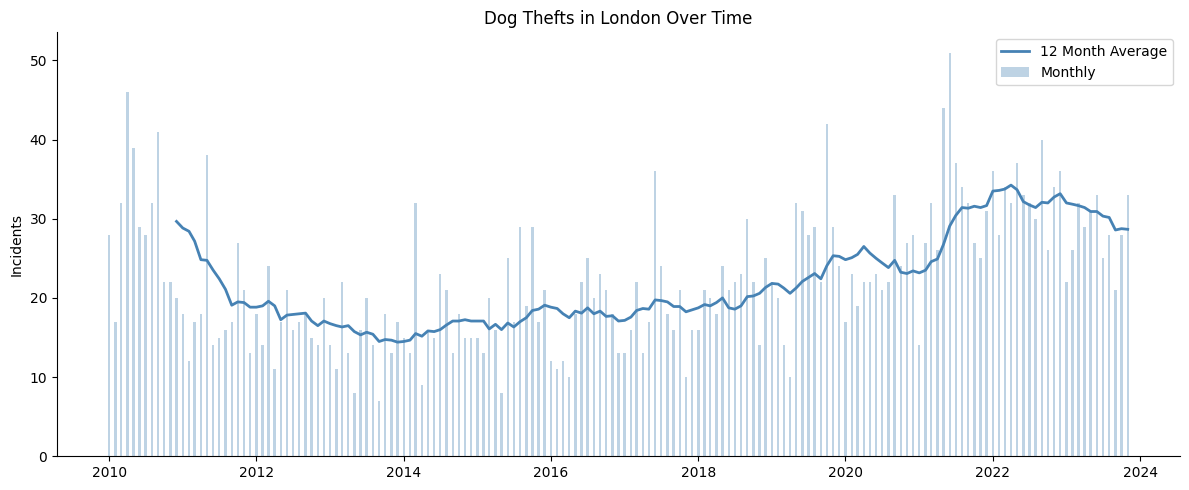

In [3]:
# Monthly Total
monthly = df.groupby('year_and_month').size().reset_index(name='thefts')

# Rolling Average 
monthly['rolling_avg'] = monthly['thefts'].rolling(12).mean()

# 
fig, ax = plt.subplots()

# X, Y
ax.bar(monthly['year_and_month'], monthly['thefts'], color='steelblue', width=12, alpha=0.35, label='Monthly')

# X, Y
ax.plot(monthly['year_and_month'], monthly['rolling_avg'], color='steelblue', linewidth=2, label='12 Month Average')

# 
ax.set_title('Dog Thefts in London Over Time')
ax.set_ylabel('Incidents')

#
ax.legend()
plt.tight_layout()
plt.show()

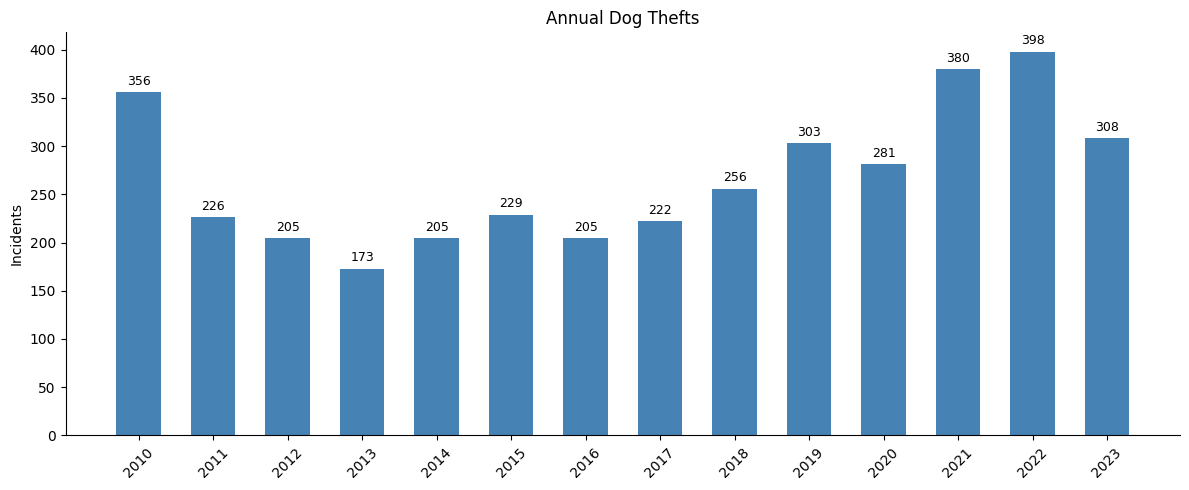

In [4]:
# Yearly Total
yearly = df.groupby('year').size().reset_index(name='thefts')

# 
fig, ax = plt.subplots()

# X, Y
bars = ax.bar(yearly['year'], yearly['thefts'], color='steelblue', width=0.6)

# Label
ax.bar_label(bars, padding=3, fontsize=9)

#
ax.set_title('Annual Dog Thefts')
ax.set_ylabel('Incidents')

# 
ax.set_xticks(yearly['year'])
ax.set_xticklabels(yearly['year'], rotation=45)

#
plt.tight_layout()
plt.show()

#### MONTHLY HEATMAP

In [5]:
# - month order
month_order = ['january', 'february', 'march', 'april', 'may', 'june', 'july', 
               'august', 'september', 'october', 'november', 'december']

# Heatmap Data
step_1 = df.groupby(['year', 'month']).size().reset_index(name='thefts')
step_2 = step_1.pivot(index='year', columns='month', values='thefts')
step_3 = step_2.reindex(columns=month_order)
heatmap_data = step_3

# View
display(step_1.head(3))
display(step_2.head(3))
display(step_3.head(3))

,year,month,thefts
0,2010,april,46
1,2010,august,32
2,2010,december,20


month,april,august,december,february,january,july,june,march,may,november,october,september
year,,,,,,,,,,,,
2010,46.0,32.0,20.0,17.0,28.0,28.0,29.0,32.0,39.0,22.0,22.0,41.0
2011,18.0,16.0,13.0,12.0,18.0,15.0,14.0,17.0,38.0,21.0,27.0,17.0
2012,11.0,17.0,20.0,14.0,18.0,16.0,21.0,24.0,17.0,14.0,15.0,18.0


month,january,february,march,april,may,june,july,august,september,october,november,december
year,,,,,,,,,,,,
2010,28.0,17.0,32.0,46.0,39.0,29.0,28.0,32.0,41.0,22.0,22.0,20.0
2011,18.0,12.0,17.0,18.0,38.0,14.0,15.0,16.0,17.0,27.0,21.0,13.0
2012,18.0,14.0,24.0,11.0,17.0,21.0,16.0,17.0,18.0,15.0,14.0,20.0


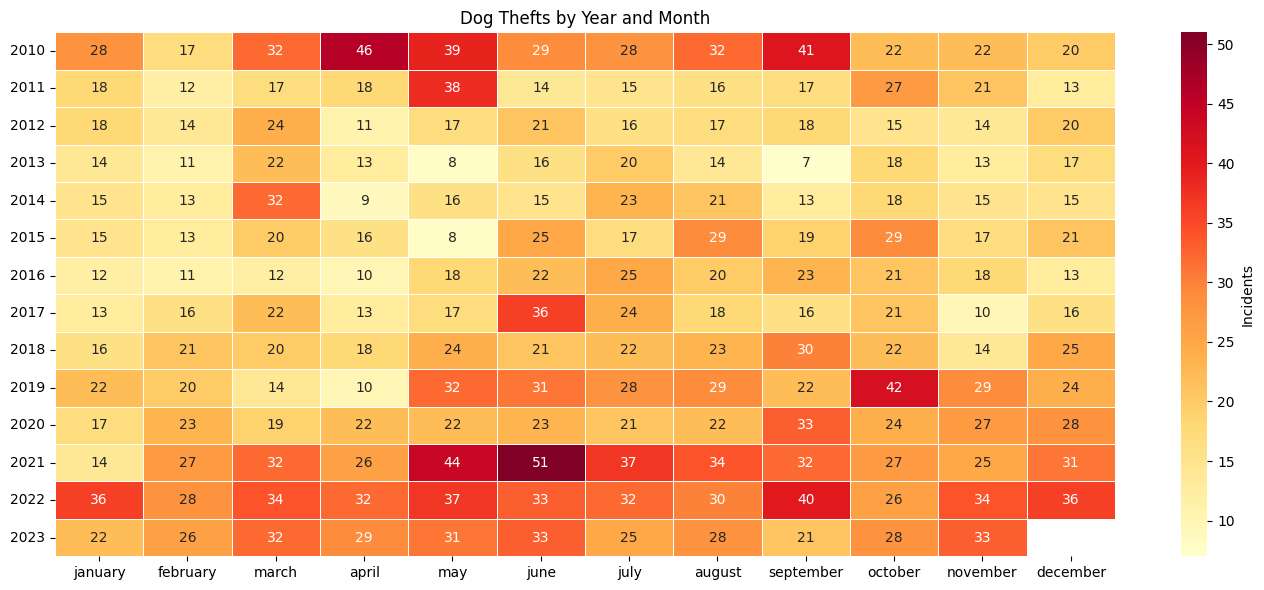

In [6]:
# 
fig, ax = plt.subplots(figsize=(14, 6))

# 
sns.heatmap(heatmap_data, ax=ax, cmap='YlOrRd', linewidths=0.5, 
            annot=True, fmt='.0f', cbar_kws={'label': 'Incidents'})

#
ax.set_title('Dog Thefts by Year and Month')
ax.set_xlabel('')
ax.set_ylabel('')

#
plt.tight_layout()
plt.show()

#### RECOVERY RATE OVER TIME
- Summer months consistently sit above average line - summer the most successful period for recoveries
- 
- 
- 

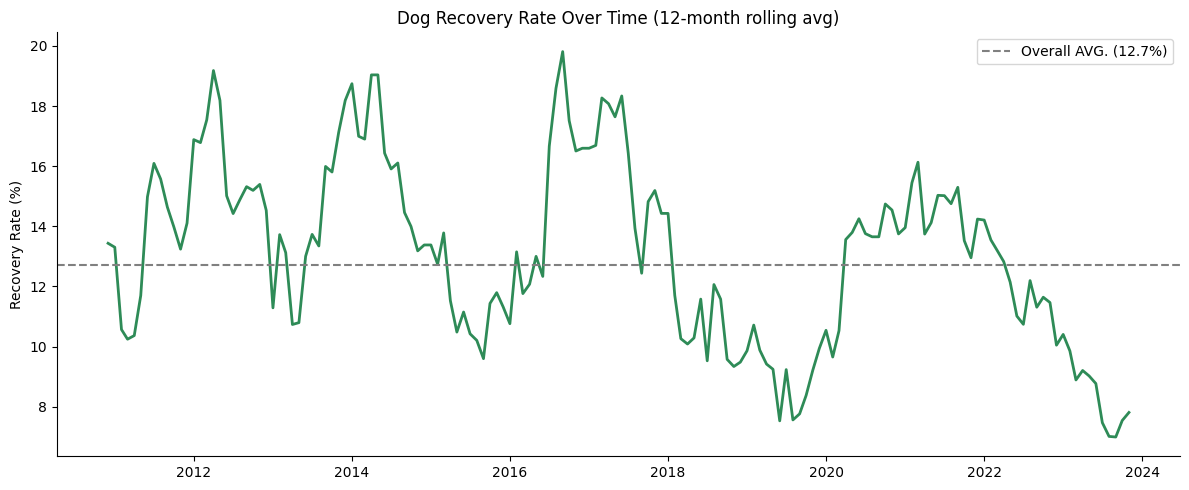

In [8]:
# Overall Recovery Rate
overall_rate = df['recovery_success'].mean()

# Monthly
monthly_recovery = df.groupby('year_and_month')['recovery_success'].mean().reset_index(name='recovery_rate')

# Rolling Average 
monthly_recovery['rolling_avg'] = monthly_recovery['recovery_rate'].rolling(12).mean()

# 
fig, ax = plt.subplots()

# ROLLING AVERAGE
ax.plot(monthly_recovery['year_and_month'], monthly_recovery['rolling_avg'] * 100, color='seagreen', linewidth=2)

# OVERALL RATE % 
ax.axhline(overall_rate * 100, linestyle='--', color='grey', label=f'Overall AVG. ({overall_rate*100:.1f}%)')

#
ax.set_title('Dog Recovery Rate Over Time (12-month rolling avg)')
ax.set_ylabel('Recovery Rate (%)')

#
ax.legend()
plt.tight_layout()
plt.show()